In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("../processed_data/data_cleaned_Carmen/20231128_only_deaths_ep_weights.csv")

In [4]:
df = df[df['allegiance'].map(df['allegiance'].value_counts()) > 30]

In [7]:
df = df[df['killer'].map(df['killer'].value_counts()) > 30]

In [8]:
df = df[df['killers_house'].map(df['killers_house'].value_counts()) > 30]

In [9]:
df = df[df['location'].map(df['location'].value_counts()) > 30]

In [10]:
df = df[df['method'].map(df['method'].value_counts()) > 30]

In [4]:
df

,Unnamed: 0,allegiance,killer,killers_house,location,method,name,episode_global_num,weights_simple
0,0,Night's Watch,White Walker,None,Beyond the Wall,Ice sword,Waymar Royce,1,0.999550
1,1,Night's Watch,White Walker,None,Beyond the Wall,Ice sword,Gared,1,0.999550
2,2,Night's Watch,Ned Stark,House Stark,Winterfell,Sword,Will,1,0.999550
3,3,None,Direwolf,None,Winterfell,Teeth,Stag,1,0.999550
4,4,None,Stag,None,Winterfell,Antler,Direwolf,1,0.999550
...,...,...,...,...,...,...,...,...,...
2219,2219,None,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234
2220,2220,None,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234
2221,2221,None,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234
2222,2222,None,Daenerys Targaryen,House Targaryen,King's Landing,Dragonfire (Dragon),King's Landing Citizen,72,0.895234


In [5]:
df = df.drop(columns=["Unnamed: 0",'name'], axis=1)

In [6]:
y = df["episode_global_num"]
y = y.to_frame(name="episode_global_num")
y.head()

,episode_global_num
0,1
1,1
2,1
3,1
4,1


In [7]:
X = df
X = X.drop(columns = ["episode_global_num"], axis=1)
X.head()

,allegiance,killer,killers_house,location,method,weights_simple
0,Night's Watch,White Walker,None,Beyond the Wall,Ice sword,0.99955
1,Night's Watch,White Walker,None,Beyond the Wall,Ice sword,0.99955
2,Night's Watch,Ned Stark,House Stark,Winterfell,Sword,0.99955
3,None,Direwolf,None,Winterfell,Teeth,0.99955
4,None,Stag,None,Winterfell,Antler,0.99955


In [8]:
num_transformer = Pipeline([('standard_scaler', StandardScaler())])

cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('num_transformer', num_transformer, ["weights_simple"]),
    ('cat_transformer', cat_transformer, ['allegiance','killer','killers_house','location','method'])
])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
X_train = pd.DataFrame(preprocessor.fit_transform(X_train),
            columns=preprocessor.get_feature_names_out())

In [16]:
X_train.columns

Index(['num_transformer__weights_simple',
       'cat_transformer__allegiance_Brotherhood Without Banners',
       'cat_transformer__allegiance_Children of the Forest',
       'cat_transformer__allegiance_Dothraki',
       'cat_transformer__allegiance_Faith Militant',
       'cat_transformer__allegiance_Faith of the Seven',
       'cat_transformer__allegiance_Free Folk',
       'cat_transformer__allegiance_Good Masters',
       'cat_transformer__allegiance_Great Masters',
       'cat_transformer__allegiance_House Arryn',
       ...
       'cat_transformer__method_Shield', 'cat_transformer__method_Spear',
       'cat_transformer__method_Steak', 'cat_transformer__method_Sword',
       'cat_transformer__method_Teeth',
       'cat_transformer__method_Teeth (Dragon)',
       'cat_transformer__method_Tusk', 'cat_transformer__method_Unknown',
       'cat_transformer__method_Whip', 'cat_transformer__method_Wildfire'],
      dtype='object', length=276)

In [22]:
model = LinearRegression()
#model.fit(X_train,y_train)
cv_results = cross_validate(model, X_train, y_train, cv=5, scoring=('neg_mean_absolute_error'))
test = cv_results["test_score"].mean()
test

-1229826564721.7766

In [20]:
cv_results

{'fit_time': array([0.02716804, 0.27970505, 0.28996301, 0.54973888, 0.29789972]),
 'score_time': array([0.04364586, 0.0171001 , 0.02943397, 0.01625395, 0.04891014]),
 'test_score': array([-1.28094492e+12, -1.44602049e+12, -1.25988697e+12, -1.18035326e+12,
        -9.81927191e+11])}

# final dataset?

In [25]:
df = pd.read_csv("../processed_data/cleaned_data_final.csv", index_col=0)

In [26]:
df

,name,male,origin,isMarried,isNoble,popularity,isAlive,season,episode,deaths,episode_num
0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,0,8,The Bells,Lord Varys - Burned alive by Drogon with his f...,71
1,Walder Frey,1,House Frey,1,1,0.896321,0,6,The Winds of Winter,Lord Walder Frey - Throat slit by Arya Stark w...,60
2,Addison Hill,1,House Lannister,0,1,0.267559,1,0,NaN,NaN,0
3,Aemma Arryn,0,House Arryn,1,1,0.183946,0,5,The Gift,Maester Aemon Targaryen - Died of natural causes.,47
4,Sylva Santagar,0,House Martell,1,1,0.043478,1,0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
1944,Luwin,1,House Stark,0,0,0.351171,0,2,Valar Morghulis,Maester Luwin - Stabbed by Osha after being st...,20
1945,Reek,1,House Bolton,0,0,0.096990,0,3,The Rains of Castamere,Orell - Stabbed in the stomach by Jon Snow usi...,29
1946,Symeon Star-Eyes,1,Foreign Peasant,0,0,0.030100,1,0,NaN,NaN,0
1947,Coldhands,1,Peasant,0,0,0.130435,1,0,NaN,NaN,0


In [27]:
df = df.drop(columns=['name', 'episode', 'deaths'], axis=1)

In [32]:
dead = df[df['isAlive'] == 0].drop(columns="isAlive")
dead

,male,origin,isMarried,isNoble,popularity,season,episode_num
0,1,House Targaryen,0,0,0.605351,8,71
1,1,House Frey,1,1,0.896321,6,60
3,0,House Arryn,1,1,0.183946,5,47
5,1,House Baratheon,0,0,1.000000,2,19
6,1,House Targaryen,1,1,0.431438,2,20
...,...,...,...,...,...,...,...
1940,1,Dothraki,0,0,0.046823,4,31
1943,0,Foreign Noble,1,0,0.140468,8,72
1944,1,House Stark,0,0,0.351171,2,20
1945,1,House Bolton,0,0,0.096990,3,29


In [43]:
y = dead[["episode_num"]]
y.head()

,episode_num
0,71
1,60
3,47
5,19
6,20


In [44]:
X = dead.drop(columns = ["episode_num", "season"], axis=1)
X.head()

,male,origin,isMarried,isNoble,popularity
0,1,House Targaryen,0,0,0.605351
1,1,House Frey,1,1,0.896321
3,0,House Arryn,1,1,0.183946
5,1,House Baratheon,0,0,1.000000
6,1,House Targaryen,1,1,0.431438


In [45]:
cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

preprocessor = ColumnTransformer([
    ('cat_transformer', cat_transformer, ['origin'])],
    remainder = 'passthrough'
)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [47]:
X_train.columns

Index(['male', 'origin', 'isMarried', 'isNoble', 'popularity'], dtype='object')

In [49]:
pipe = make_pipeline(preprocessor, LinearRegression())

In [50]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['origin'])])),
                ('linearregression', LinearRegression())])

In [51]:
pipe.score(X_test, y_test)

0.019854383393595576

In [53]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")

In [57]:
cv_results['test_score']#.mean()

array([-2.49551282e+01, -1.68037781e+12, -2.06602564e+01, -2.11674679e+01,
       -1.88893821e+01])

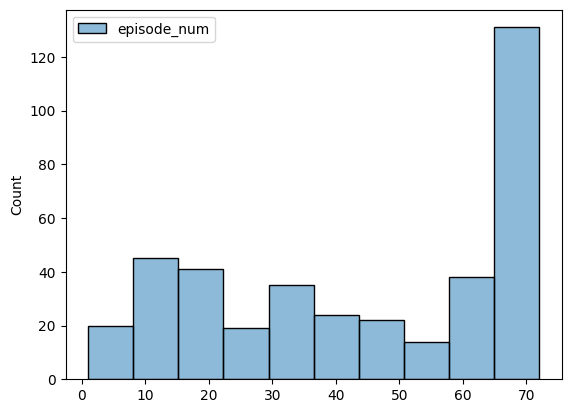

In [63]:
sns.histplot(y_train);

In [69]:
len(y_train)

389

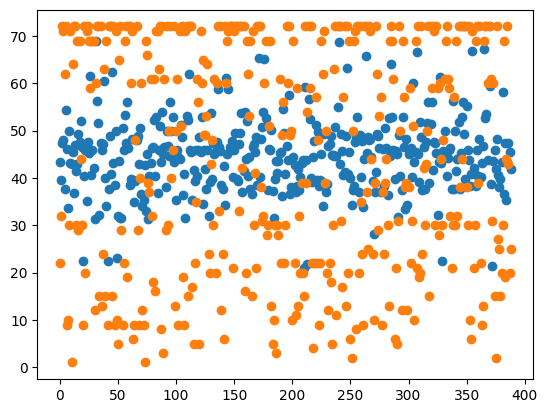

In [70]:
y_pred = pipe.predict(X_train)
plt.scatter(range(len(y_train)), y_pred)
plt.scatter(range(len(y_train)), y_train)
plt.show()